<b>Analysis</b>

1. For December 13, 2017, the New York Times' recent tweets most likely had an overall negative conotation.
2. For December 13, 2017, CBS had the most positive tweets amongst the 5 news sources with a polarity score of about 0.07.
3. For December 13, 2017, 3 out of the 5 news sources had negative polarity scores which indicates that this day's current events were not very favorable causing these media outlets to tweet out mostly negative statuses.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "yacv0rC86ZEkyukv2o5w547Xo"
consumer_secret = "a4WbWKPHt18e4YuifNg5CwLnpVH1OO9cvEbvWA5tr2BnpJb9vm"
access_token = "937017339307999232-7BwE0XKxNX8aR4CAUNyUeZyAaBX9LZ7"
access_token_secret = "7pVBRMMKKlGT1yGA45wrIOwQ8y6EzkzUfthO51g1hbUx4"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [19]:
# Target Search Term
target_users = ("@BBC","@CBS", "@CNN", "@foxnews","@nytimes")

# Array to hold sentiment
sentiments = []

# Variable for holding the oldest tweet
counter = 1

# Loop through all target users
for user in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago_list = []

    # Loop through 5 times
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(user, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

           

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweet_ago = counter
    
            # Store the Sentiments
            sentiments.append({"Date": tweet["created_at"],
                 "User": user,
                 "Compound": compound,
                 "Positive": pos,
                 "Neutral": neu,
                 "Negative": neg,
                 "Tweet Count": counter})
            
            
            if counter < 100:
                counter += 1
            else:
                counter = 1


In [20]:
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Count,User
0,0.0000,Wed Dec 13 20:17:12 +0000 2017,0.000,1.000,0.000,1,@BBC
1,0.0000,Wed Dec 13 20:16:42 +0000 2017,0.000,1.000,0.000,2,@BBC
2,0.9078,Wed Dec 13 20:16:32 +0000 2017,0.000,0.392,0.608,3,@BBC
3,-0.6597,Wed Dec 13 20:16:19 +0000 2017,0.216,0.784,0.000,4,@BBC
4,0.3384,Wed Dec 13 20:15:33 +0000 2017,0.000,0.870,0.130,5,@BBC


In [21]:
# Filter Polarity by Users for Scatter Plot
bbc = sentiments_df[sentiments_df['User'] == '@BBC']
cbs = sentiments_df[sentiments_df['User'] == '@CBS']
cnn = sentiments_df[sentiments_df['User'] == '@CNN']
foxnews = sentiments_df[sentiments_df['User'] == '@foxnews']
nytimes = sentiments_df[sentiments_df['User'] =='@nytimes']

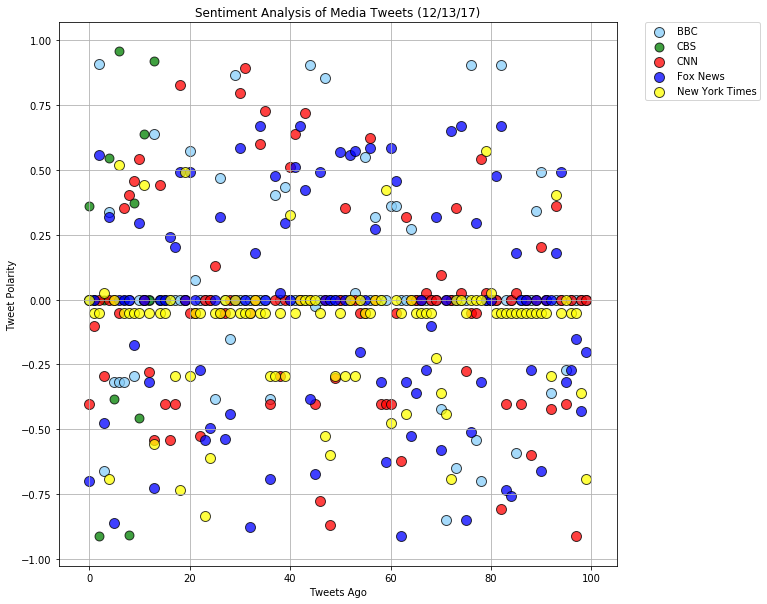

In [45]:
# Create plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(np.arange(len(bbc["Compound"])), bbc["Compound"], s=bbc["User"].count(), c='lightskyblue', marker='o',edgecolors="black", label='BBC', alpha=0.75)
ax1.scatter(np.arange(len(cbs["Compound"])), cbs["Compound"], s=5*cbs["User"].count(), c='green', marker='o',edgecolors="black", label='CBS', alpha=0.75)
ax1.scatter(np.arange(len(cnn["Compound"])), cnn["Compound"], s=cnn["User"].count(), c='red', marker='o',edgecolors="black", label='CNN', alpha=0.75)
ax1.scatter(np.arange(len(foxnews["Compound"])), foxnews["Compound"], s=foxnews["User"].count(), c='blue', marker='o',edgecolors="black", label='Fox News', alpha=0.75)
ax1.scatter(np.arange(len(nytimes["Compound"])), nytimes["Compound"], s=nytimes["User"].count(), c='yellow', marker='o',edgecolors="black", label='New York Times', alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.title("Sentiment Analysis of Media Tweets (12/13/17)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.savefig("SentimentAnalysisMediaTweets_scatter.png")

In [41]:
x_axis = np.arange(len(target_users))

In [42]:
y_axis = [bbc['Compound'].mean(), cbs['Compound'].mean(), cnn['Compound'].mean(), 
          foxnews['Compound'].mean(), nytimes['Compound'].mean()]

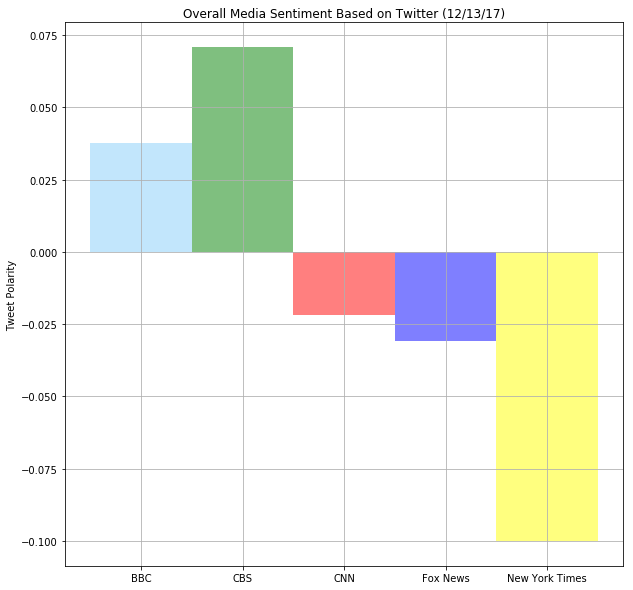

'SentimentAnalysisMediaTweets_bar.png'

In [46]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.bar(x_axis, y_axis, color=("lightskyblue", "green", "red", 
        "blue", "yellow"), alpha=0.5, align="edge", width=1.0)

# Incorporate the other graph properties
plt.title("Overall Media Sentiment Based on Twitter (12/13/17)")
plt.ylabel("Tweet Polarity")
tic_loc = [value+0.5 for value in x_axis]
plt.xticks(tic_loc, ["BBC", "CBS", "CNN", "Fox News", "New York Times"])


plt.grid()
plt.show()


("SentimentAnalysisMediaTweets_bar.png")

In [44]:
#Save Dataframe to a CSV

sentiments_df.to_csv("SentimentAnalysis.csv", encoding="utf-8", index=False)